In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io

plt.rc("font", family=["Helvetica", "Arial"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [3]:
entries_list_s = os.listdir("directory1")
entries_list_p = os.listdir("directory2")

def func(x, a):
    return a

def get_I(pol, entry_list):
    if pol == "s":
        rempart = "s"
    else:
        rempart = "p"
    Is = np.zeros(len(entry_list))
    phis = np.zeros(len(entry_list))
    for i, file in enumerate(entries_list):
        name = file.replace(f"phi_{rempart} = ", "")
        phis[i] = float(name)*180/np.pi
        dat = io.loadmat(f"Directory/{file}")
        V = dat.get("A")
        V = np.reshape(V, (len(V)))
        xs = np.linspace(0, 50, len(V))
        fitted, pcov = curve_fit(func, xs, V, absolute_sigma=True)
        perr1 = np.sqrt(np.diag(pcov))
        Is[i] = fitted
        #Is[i] = fitted - mean_Voff #Til hvis vi skal have offset med, men denne er ligegyldig, idet vi bare skal finde maks intens
    return phis, Is

def Intensity(phi, I_m):
    I = I_m*np.cos(phi)**2
    return I

In [ ]:
Is_p, phi_p = get_I("p", entries_list_p)
Is_s, phi_s = get_I("s", entries_list_s)

I_mp, pcovp = curve_fit(Intensity, phi_p, Is_p, absolute_sigma=True) 
I_ms, pcovs = curve_fit(Intensity, phi_s, Is_s, absolute_sigma=True) 

NameError: name 'phi_p' is not defined

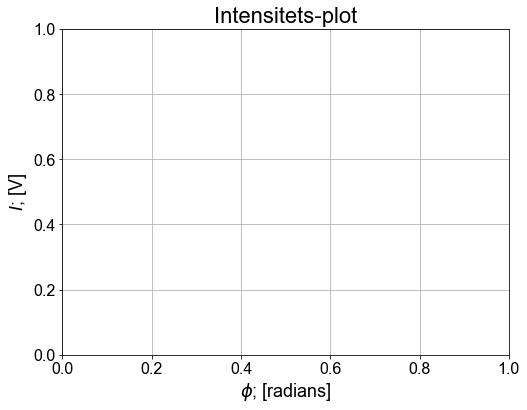

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Intensitets-plot")
ax.set_xlabel(r"$\phi$; [radians]")
ax.set_ylabel(r"$I$; [V]")
ax.grid()

phis = np.linspace(40*np.pi/180, 50*np.pi/180)

ax.plot(phi_p, Is_p, label="P-Intensities")
ax.plot(phi_s, Is_s, label="s-Intensities")
ax.plot(phis, Intensity(phis, I_mp), '--', lw=2, c="r", label=r"fit til $I_p(\phi)$")
ax.plot(phis, Intensity(phis, I_ms), '--', lw=2, c="b", label=r"fit til $I_s(\phi)$")

ax.legend()